In [84]:
import scipy.sparse
import pandas as pd
import numpy as np
import talib
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
def show_feature_describe(train):
    stats = []
    for col in train.columns:
        stats.append((col,
                    train[col].nunique(),
                    train[col].value_counts().index[0],
                    train[col].value_counts().values[0],
                    train[col].isnull().sum() * 100 / train.shape[0],
                    train[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                    train[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique values', 'Most frequent item', 'Freuquence of most frequent item', 'Percentage of missing values', 'Percentage of values in the biggest category', 'Type'])
    stats_df.sort_values('Percentage of missing values', ascending=False)
    return stats_df

In [86]:
data = pd.read_csv("./data/eur_usd_1H.csv")
del data["Unnamed: 0"]
data

,volume,time,open,high,low,close
0,3550,2011-07-26T08:00:00.000000000Z,1.44998,1.45086,1.44787,1.44807
1,2950,2011-07-26T09:00:00.000000000Z,1.44805,1.44826,1.44622,1.44757
2,2230,2011-07-26T10:00:00.000000000Z,1.44760,1.44844,1.44667,1.44777
3,2197,2011-07-26T11:00:00.000000000Z,1.44780,1.44920,1.44738,1.44757
4,2683,2011-07-26T12:00:00.000000000Z,1.44760,1.44908,1.44708,1.44740
...,...,...,...,...,...,...
59995,2931,2021-02-12T17:00:00.000000000Z,1.21252,1.21288,1.21231,1.21234
59996,2364,2021-02-12T18:00:00.000000000Z,1.21235,1.21264,1.21192,1.21215
59997,1697,2021-02-12T19:00:00.000000000Z,1.21214,1.21236,1.21156,1.21157
59998,1629,2021-02-12T20:00:00.000000000Z,1.21158,1.21192,1.21132,1.21184


In [87]:
OFFSET = 1
target = []
for i in range(len(data["close"]) - OFFSET):
    target.append(1 if data["close"][i + OFFSET] >= data["close"][i] else 0)
target_df = pd.DataFrame(target, columns=["target"])


In [88]:
data = pd.concat([data, target_df], axis=1)
data = data.dropna()
data

,volume,time,open,high,low,close,target
0,3550,2011-07-26T08:00:00.000000000Z,1.44998,1.45086,1.44787,1.44807,0.0
1,2950,2011-07-26T09:00:00.000000000Z,1.44805,1.44826,1.44622,1.44757,1.0
2,2230,2011-07-26T10:00:00.000000000Z,1.44760,1.44844,1.44667,1.44777,0.0
3,2197,2011-07-26T11:00:00.000000000Z,1.44780,1.44920,1.44738,1.44757,0.0
4,2683,2011-07-26T12:00:00.000000000Z,1.44760,1.44908,1.44708,1.44740,0.0
...,...,...,...,...,...,...,...
59994,5681,2021-02-12T16:00:00.000000000Z,1.21194,1.21284,1.21152,1.21251,0.0
59995,2931,2021-02-12T17:00:00.000000000Z,1.21252,1.21288,1.21231,1.21234,0.0
59996,2364,2021-02-12T18:00:00.000000000Z,1.21235,1.21264,1.21192,1.21215,0.0
59997,1697,2021-02-12T19:00:00.000000000Z,1.21214,1.21236,1.21156,1.21157,1.0


In [89]:
show_feature_describe(data)

,Feature,Unique values,Most frequent item,Freuquence of most frequent item,Percentage of missing values,Percentage of values in the biggest category,Type
0,volume,8589,1,328,0.0,0.546676,int64
1,time,59999,2013-10-15T04:00:00.000000000Z,1,0.0,0.001667,object
2,open,24780,1.4396,47,0.0,0.078335,float64
3,high,24691,1.4396,46,0.0,0.076668,float64
4,low,24713,1.4396,44,0.0,0.073335,float64
5,close,24682,1.4396,47,0.0,0.078335,float64
6,target,2,1,30475,0.0,50.792513,float64


In [90]:
data.describe()

,volume,open,high,low,close,target
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,2095.096068,1.202574,1.203413,1.201758,1.202573,0.507925
std,2457.302405,0.102316,0.102366,0.102260,0.102310,0.499941
min,1.000000,1.035590,1.037020,1.034060,1.035620,0.000000
25%,629.000000,1.117290,1.118060,1.116570,1.117300,0.000000
50%,1316.000000,1.174220,1.174900,1.173480,1.174220,1.000000
75%,2609.000000,1.300760,1.301720,1.299820,1.300740,1.000000
max,53617.000000,1.454150,1.454870,1.453460,1.454180,1.000000


In [91]:
def calc_sakata(df, o, h, l, c):
    df['CDL2CROWS'] = talib.CDL2CROWS(o, h, l, c)
    df['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(o, h, l, c)
    df['CDL3INSIDE'] = talib.CDL3INSIDE(o, h, l, c)
    df['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(o, h, l, c)
    df['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(o, h, l, c)
    df['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(o, h, l, c)
    df['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(o, h, l, c)
    df['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(o, h, l, c)
    df['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(o, h, l, c)
    df['CDLBELTHOLD'] = talib.CDLBELTHOLD(o, h, l, c)
    df['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(o, h, l, c)
    df['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(o, h, l, c)
    df['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(o, h, l, c)
    df['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(o, h, l, c)
    df['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(o, h, l, c)
    df['CDLDOJI'] = talib.CDLDOJI(o, h, l, c)
    df['CDLDOJISTAR'] = talib.CDLDOJISTAR(o, h, l, c)
    df['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(o, h, l, c)
    df['CDLENGULFING'] = talib.CDLENGULFING(o, h, l, c)
    df['CDLEVENINGDOJISTAR'] = talib.CDLEVENINGDOJISTAR(o, h, l, c)
    df['CDLEVENINGSTAR'] = talib.CDLEVENINGSTAR(o, h, l, c)
    df['CDLGAPSIDESIDEWHITE'] = talib.CDLGAPSIDESIDEWHITE(o, h, l, c)
    df['CDLGRAVESTONEDOJI'] = talib.CDLGRAVESTONEDOJI(o, h, l, c)
    df['CDLHAMMER'] = talib.CDLHAMMER(o, h, l, c)
    df['CDLHANGINGMAN'] = talib.CDLHANGINGMAN(o, h, l, c)
    df['CDLHARAMI'] = talib.CDLHARAMI(o, h, l, c)
    df['CDLHARAMICROSS'] = talib.CDLHARAMICROSS(o, h, l, c)
    df['CDLHIGHWAVE'] = talib.CDLHIGHWAVE(o, h, l, c)
    df['CDLHIKKAKE'] = talib.CDLHIKKAKE(o, h, l, c)
    df['CDLHIKKAKEMOD'] = talib.CDLHIKKAKEMOD(o, h, l, c)
    df['CDLHOMINGPIGEON'] = talib.CDLHOMINGPIGEON(o, h, l, c)
    df['CDLIDENTICAL3CROWS'] = talib.CDLIDENTICAL3CROWS(o, h, l, c)
    df['CDLINNECK'] = talib.CDLINNECK(o, h, l, c)
    df['CDLINVERTEDHAMMER'] = talib.CDLINVERTEDHAMMER(o, h, l, c)
    df['CDLKICKING'] = talib.CDLKICKING(o, h, l, c)
    df['CDLKICKINGBYLENGTH'] = talib.CDLKICKINGBYLENGTH(o, h, l, c)
    df['CDLLADDERBOTTOM'] = talib.CDLLADDERBOTTOM(o, h, l, c)
    df['CDLLONGLEGGEDDOJI'] = talib.CDLLONGLEGGEDDOJI(o, h, l, c)
    df['CDLLONGLINE'] = talib.CDLLONGLINE(o, h, l, c)
    df['CDLMARUBOZU'] = talib.CDLMARUBOZU(o, h, l, c)
    df['CDLMATCHINGLOW'] = talib.CDLMATCHINGLOW(o, h, l, c)
    df['CDLMATHOLD'] = talib.CDLMATHOLD(o, h, l, c)
    df['CDLMORNINGDOJISTAR'] = talib.CDLMORNINGDOJISTAR(o, h, l, c)
    df['CDLMORNINGSTAR'] = talib.CDLMORNINGSTAR(o, h, l, c)
    df['CDLONNECK'] = talib.CDLONNECK(o, h, l, c)
    df['CDLPIERCING'] = talib.CDLPIERCING(o, h, l, c)
    df['CDLRICKSHAWMAN'] = talib.CDLRICKSHAWMAN(o, h, l, c)
    df['CDLRISEFALL3METHODS'] = talib.CDLRISEFALL3METHODS(o, h, l, c)
    df['CDLSEPARATINGLINES'] = talib.CDLSEPARATINGLINES(o, h, l, c)
    df['CDLSHOOTINGSTAR'] = talib.CDLSHOOTINGSTAR(o, h, l, c)
    df['CDLSHORTLINE'] = talib.CDLSHORTLINE(o, h, l, c)
    df['CDLSPINNINGTOP'] = talib.CDLSPINNINGTOP(o, h, l, c)
    df['CDLSTALLEDPATTERN'] = talib.CDLSTALLEDPATTERN(o, h, l, c)
    df['CDLSTICKSANDWICH'] = talib.CDLSTICKSANDWICH(o, h, l, c)
    df['CDLTAKURI'] = talib.CDLTAKURI(o, h, l, c)
    df['CDLTASUKIGAP'] = talib.CDLTASUKIGAP(o, h, l, c)
    df['CDLTHRUSTING'] = talib.CDLTHRUSTING(o, h, l, c)
    df['CDLTRISTAR'] = talib.CDLTRISTAR(o, h, l, c)
    df['CDLUNIQUE3RIVER'] = talib.CDLUNIQUE3RIVER(o, h, l, c)
    df['CDLUPSIDEGAP2CROWS'] = talib.CDLUPSIDEGAP2CROWS(o, h, l, c)
    df['CDLXSIDEGAP3METHODS'] = talib.CDLXSIDEGAP3METHODS(o, h, l, c)
    return df

In [92]:
data = calc_sakata(data, data["open"], data["high"], data["low"], data["close"])
data

,volume,time,open,high,low,close,target,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
0,3550,2011-07-26T08:00:00.000000000Z,1.44998,1.45086,1.44787,1.44807,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2950,2011-07-26T09:00:00.000000000Z,1.44805,1.44826,1.44622,1.44757,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2230,2011-07-26T10:00:00.000000000Z,1.44760,1.44844,1.44667,1.44777,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2197,2011-07-26T11:00:00.000000000Z,1.44780,1.44920,1.44738,1.44757,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2683,2011-07-26T12:00:00.000000000Z,1.44760,1.44908,1.44708,1.44740,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,5681,2021-02-12T16:00:00.000000000Z,1.21194,1.21284,1.21152,1.21251,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,2931,2021-02-12T17:00:00.000000000Z,1.21252,1.21288,1.21231,1.21234,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,2364,2021-02-12T18:00:00.000000000Z,1.21235,1.21264,1.21192,1.21215,0.0,0,0,0,...,-100,0,0,0,0,0,0,0,0,0
59997,1697,2021-02-12T19:00:00.000000000Z,1.21214,1.21236,1.21156,1.21157,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
result = show_feature_describe(data)

In [94]:
# https://non-dimension.com/candle-signal-check/
sakata_both_columns = ["CDLGAPSIDESIDEWHITE", "CDLTRISTAR", "CDLTASUKIGAP", "CDLBREAKAWAY", "CDLXSIDEGAP3METHODS", "CDLHARAMI", "CDLBELTHOLD", "CDLDOJISTAR", "CDLKICKING", "CDLSEPARATINGLINES", "CDLRISEFALL3METHODS", "CDL3LINESTRIKE", "CDLCOUNTERATTACK", "CDLHARAMICROSS", "CDL3INSIDE", "CDLHIKKAKE", "CDLABANDONEDBABY", "CDLSTICKSANDWICH", "CDL3OUTSIDE", "CDLENGULFING", "CDLMATHOLD"]
sakata_buy_columns = ["CDL3WHITESOLDIERS", "CDL3STARSINSOUTH", "CDLCONCEALBABYSWALL", "CDLINVERTEDHAMMER", "CDLPIERCING", "CDLTAKURI", "CDLMORNINGSTAR", "CDLHIKKAKEMOD", "CDLHAMMER", "CDLUNIQUE3RIVER", "CDLLADDERBOTTOM", "CDLHOMINGPIGEON", "CDLMATCHINGLOW", "CDLMORNINGDOJISTAR"]
sakata_sell_columns = ["CDLONNECK", "CDLDARKCLOUDCOVER", "CDLHANGINGMAN", "CDLEVENINGDOJISTAR", "CDL3BLACKCROWS", "CDLUPSIDEGAP2CROWS", "CDLTHRUSTING", "CDLSHOOTINGSTAR", "CDLIDENTICAL3CROWS", "CDLSTALLEDPATTERN", "CDLADVANCEBLOCK", "CDLINNECK","CDL2CROWS", "CDLEVENINGSTAR"]

In [95]:
len(sakata_both_columns) + len(sakata_buy_columns) + len(sakata_sell_columns)


49

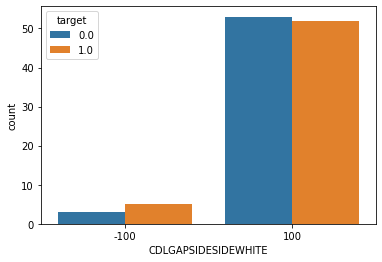

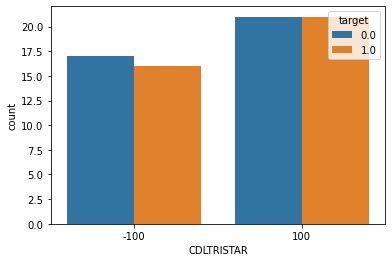

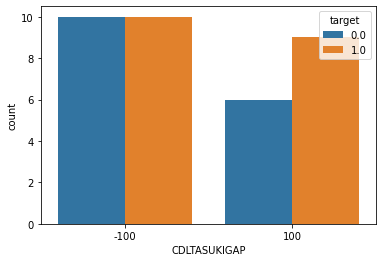

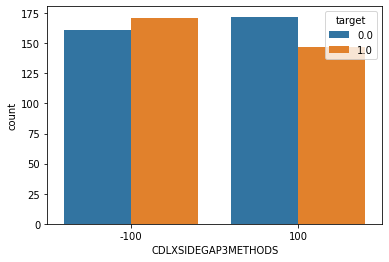

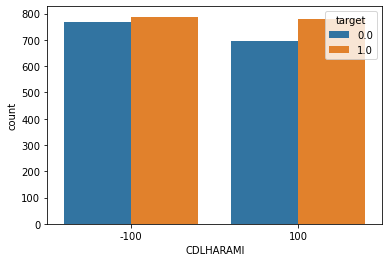

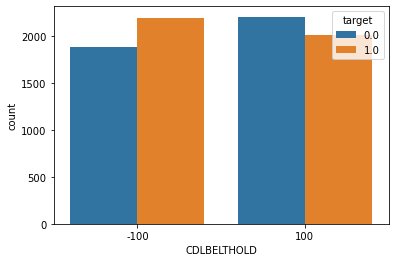

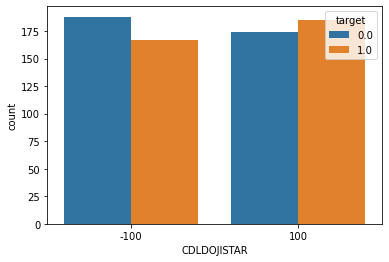

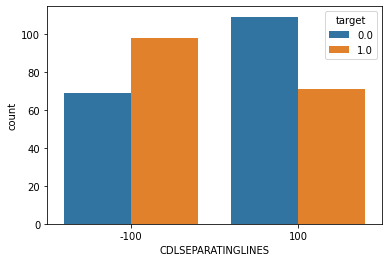

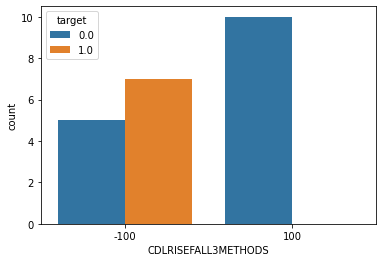

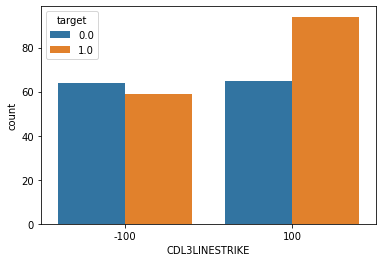

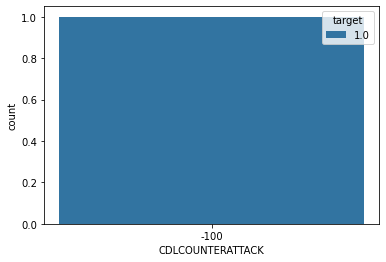

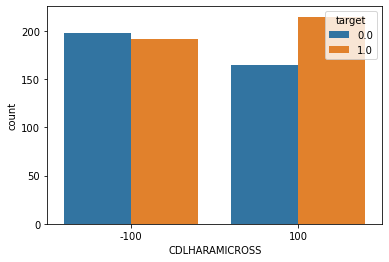

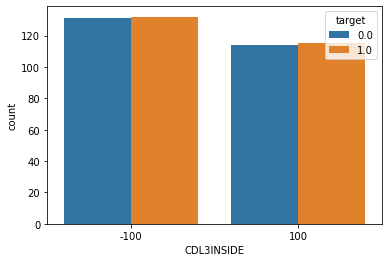

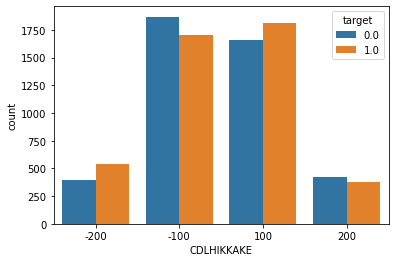

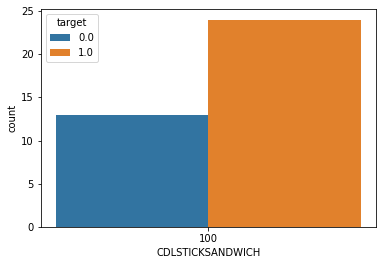

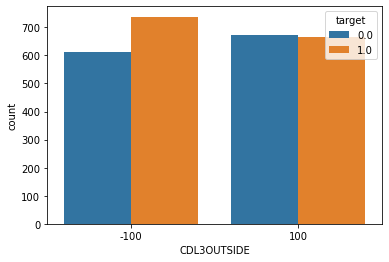

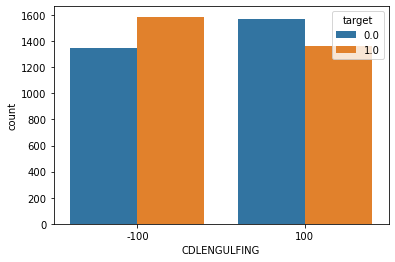

In [96]:
for i in sakata_both_columns:
    if len(data[data[i] != 0]) > 0:
        sns.countplot(i,hue="target",data=data[data[i] != 0])
    #sns.countplot(i,hue="target",data=data)
        plt.show()